CUST_ID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES : Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX : Numbe of purchase transactions made
CREDIT_LIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

sns.set()

In [31]:
df = pd.read_csv(r'CC GENERAL.csv', low_memory=False)

8950

In [3]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5456,C15609,417.898933,0.900000,1735.17,1116.67,618.50,649.936157,0.900000,0.300000,0.800000,0.100000,2,20,2500.0,1892.675483,170.458741,0.125000,10
3079,C13168,13.362018,0.363636,119.46,60.27,59.19,0.000000,0.250000,0.166667,0.083333,0.000000,0,4,7500.0,534.740352,132.441551,0.000000,12
6338,C16513,564.365240,1.000000,0.00,0.00,0.00,1003.670076,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,1219.363040,225.940694,0.083333,12
6285,C16460,1394.926414,1.000000,0.00,0.00,0.00,4091.737498,0.000000,0.000000,0.000000,0.250000,5,0,5000.0,488.155542,299.651665,0.000000,12
6748,C16936,4.766639,0.363636,32.22,0.00,32.22,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,6000.0,185.232035,124.667450,0.500000,12


In [34]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
df = df.drop('CUST_ID',1)

In [6]:
df.isna().sum().sum()

314

## KNN imputer

In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=12, weights='uniform', metric='nan_euclidean')
# Fit imputer
imputer.fit(df)
# Transform imputer
df[:]= imputer.transform(df)
df.isna().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [ ]:
# '''box plot of all features, excluding ID'''
# df.plot(kind='box')
# None

# corr = df.corr()
# sns.heatmap(corr)

## StandardScaler fit-transform

In [5]:
ss = StandardScaler()

ss.fit(df)

X = ss.transform(df)

X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30347229,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09519629,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09500936,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32787175,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33926674,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32536281,
        -0.52555097, -4.12276757]])

## K-means

### Silhouette score

In [ ]:
silhouette_list= []
for i in range(2,10):  
  model_kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
  visualizer.fit(X)
  silhouette_avg = silhouette_score(X, model_kmeans.labels_)
  visualizer.poof()
  silhouette_list.append(silhouette_avg)

In [ ]:
plt.plot([x for x in range(2,10)],silhouette_list,linestyle='',marker='.')
plt.ylim([0,1])

## HIERARCHICAL

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')  
cluster.fit_predict(X)

In [ ]:
pd.Series(cluster.labels_).value_counts()

## ELBOW

In [ ]:
'''k means - determine optimal k'''
K = range(1,10)
kmeans = [KMeans(n_clusters=k) for k in K]
score = [kmeans[k].fit(X).score(X) for k in range(len(kmeans))]

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

In [ ]:
# alternative visualization method
'''plot the elbow'''
plt.plot(K, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### silhouette for k=4

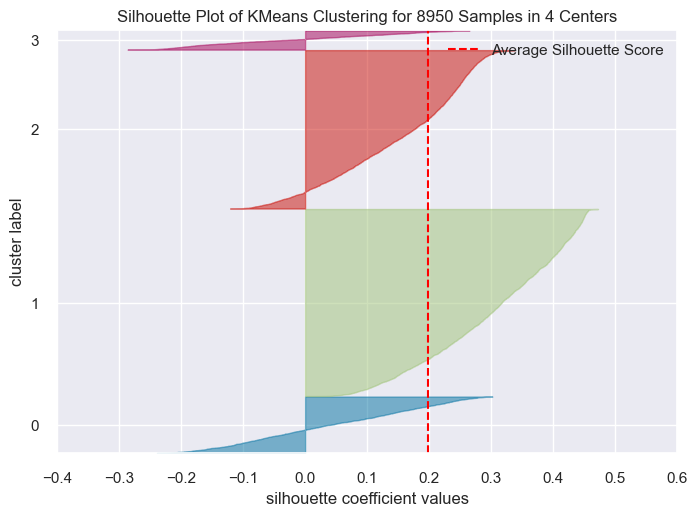

In [10]:
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
None

## PCAnalysis

In [7]:
from sklearn.decomposition import PCA

We can explain more than 99% of variance with any number of dimensions more than:  14


Text(0, 0.5, 'cumulative explained variance')

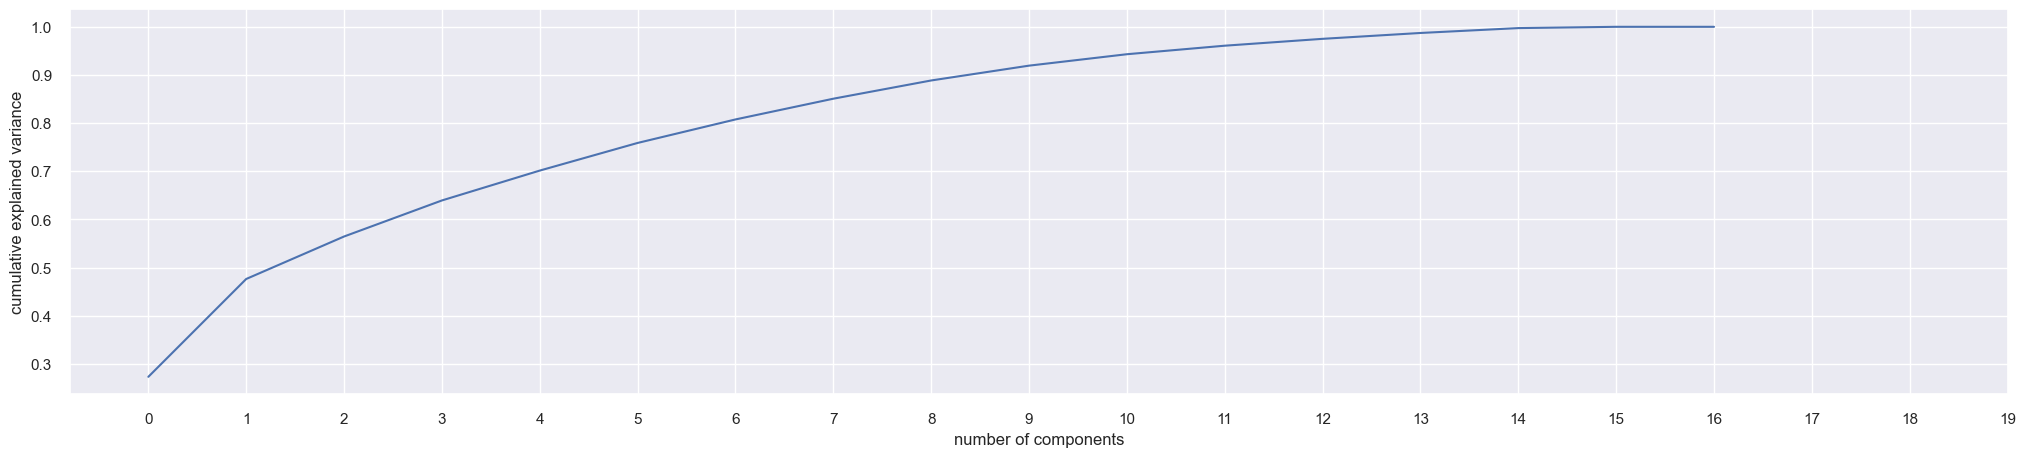

In [8]:
pca = PCA()
pc = pca.fit_transform(X)
ratio = pca.explained_variance_ratio_
sum_ratio = np.cumsum(ratio)
n = np.where(sum_ratio >.99) # here we can try for 95% using >0.95
n_components = n[0][0]
print("We can explain more than 99% of variance with any number of dimensions more than: ",n_components)

#Lets also plot how much of added information each dimension add to our model

pca = pca.fit(X)
plt.figure(figsize=(25,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,20))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [9]:
n_components

14

In [10]:
pca = PCA(n_components)
pca_X = pca.fit_transform(X)

In [11]:
len(pca_X)

8950

### silhouette score for data with PCA features

In [ ]:
silhouette_list= []
for i in range(2,10):  
  model_kmeans = KMeans(n_clusters=i, random_state=0).fit(pca_X)
  visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
  visualizer.fit(pca_X)
  silhouette_avg = silhouette_score(pca_X, model_kmeans.labels_)
  visualizer.poof()
  silhouette_list.append(silhouette_avg)

In [ ]:
plt.plot([x for x in range(2,10)],silhouette_list,linestyle='',marker='.')
plt.ylim([0,1])

### Hierarchical Clustering Dendrogram for data with PCA features

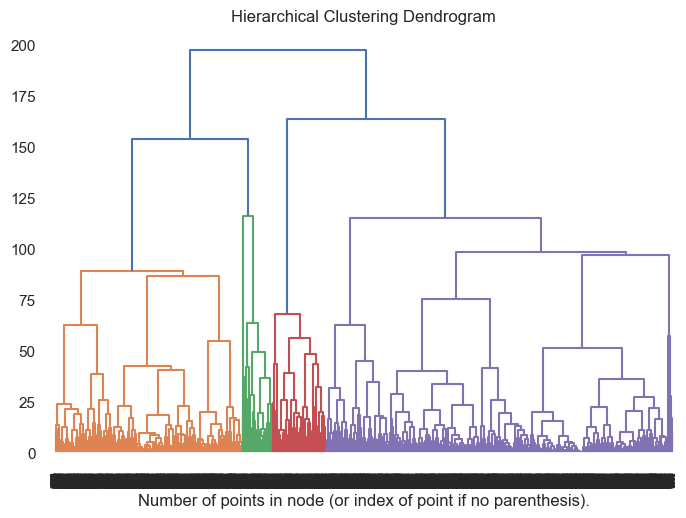

In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(pca_X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Determining optimal k for data with PCA features

In [16]:
'''k means - determine optimal k'''
K = range(1,10)
kmeans = [KMeans(n_clusters=k) for k in K]
score = [kmeans[k].fit(pca_X).score(pca_X) for k in range(len(kmeans))]

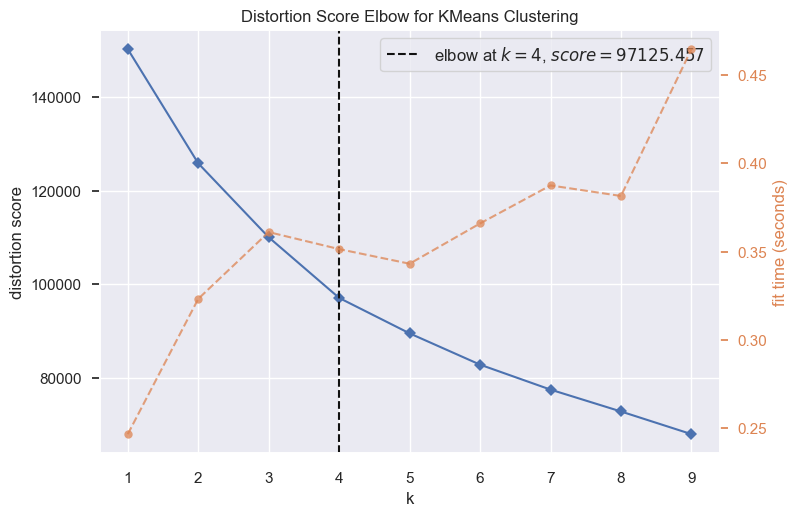

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(pca_X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

# CLUSTERS k=4

In [18]:
df.isna().sum().sum()

0

In [19]:
len(df)

8950

In [21]:
df.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3145,1884.252524,1.0,1358.88,116.63,1242.25,0.000000,1.000000,0.166667,1.000000,0.000000,0.0,79.0,1200.0,303.560901,18959.869380,0.00,12.0
2431,451.905949,1.0,4468.71,3870.15,598.56,0.000000,1.000000,1.000000,0.416667,0.000000,0.0,53.0,4000.0,4009.961094,184.310480,1.00,12.0
2746,4202.169500,1.0,462.00,462.00,0.00,4776.104770,0.166667,0.166667,0.000000,0.416667,10.0,2.0,8000.0,1010.799168,1541.756326,0.00,12.0
731,4834.586867,1.0,0.00,0.00,0.00,56.747353,0.000000,0.000000,0.000000,0.100000,1.0,0.0,5500.0,874.365824,1582.515056,0.00,10.0
4109,200.806352,1.0,1957.45,1799.14,158.31,0.000000,1.000000,1.000000,0.166667,0.000000,0.0,49.0,6000.0,1934.825977,193.934077,0.75,12.0


## k-mean

In [12]:
'''use the best K from elbow method'''
model = KMeans(
        n_clusters=4,
        init='k-means++',
#         n_jobs=-1,
        random_state=1)

model = model.fit(pca_X)

y = model.predict(pca_X)

In [13]:
pd.Series(y).value_counts()

2    3994
1    3347
0    1211
3     398
dtype: int64

In [14]:
y1 = pd.Series(y)

In [25]:
pd.Series(y).isna().sum()

0

In [26]:
pd.DataFrame(pca_X).isna().sum().sum()

0

In [27]:
df.isna().sum().sum()

0

In [ ]:
len(y1),len(y)

In [ ]:
len(pca_X),len(df)

In [15]:
final = pd.concat([df,y1],1)

In [16]:
# final.isna().sum()
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [ ]:
# final.dropna(1,inplace=True)

In [17]:
final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,487.552204,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,133.237275,0.000000,6.0,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0,2


In [ ]:
final.info()

In [18]:
final['clusters'] = final[0]
final.drop([0],1,inplace=True)
# apotel.dropna(inplace=True)

In [19]:
final.isna().sum().sum()

0

In [33]:
# final.sample(40)

In [20]:
final.groupby('clusters').count().sort_values('clusters')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
1,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347
2,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994,3994
3,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398


In [23]:
from matplotlib.pyplot import savefig 

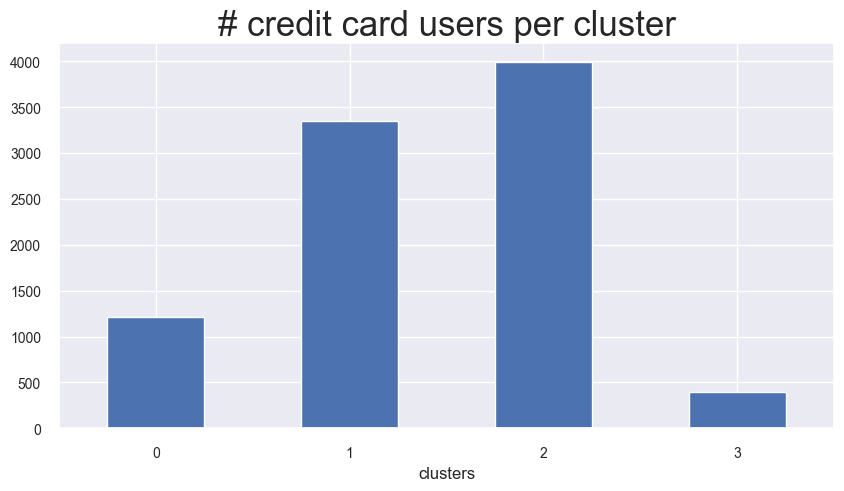

In [44]:
final.groupby('clusters').count()['TENURE'].plot.bar(figsize=(10,5),rot=0)
plt.title('# credit card users per cluster',fontsize = 25)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.savefig('demo.png', transparent=True)
None

In [ ]:
final.mean()['BALANCE']

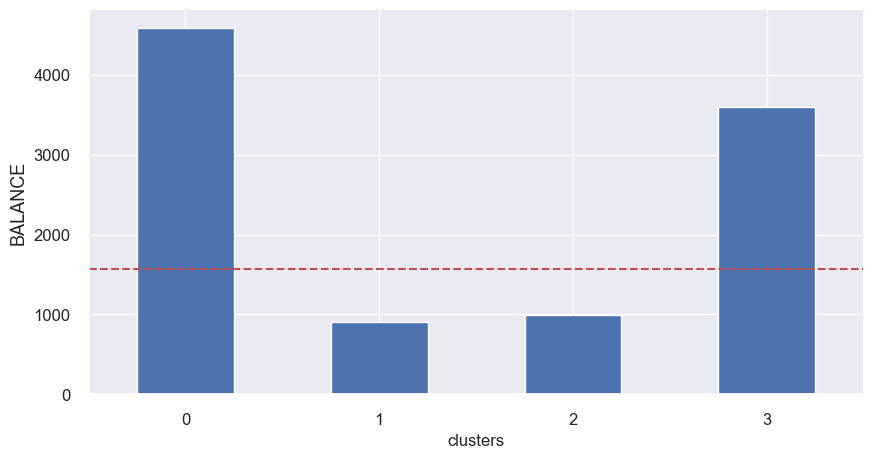

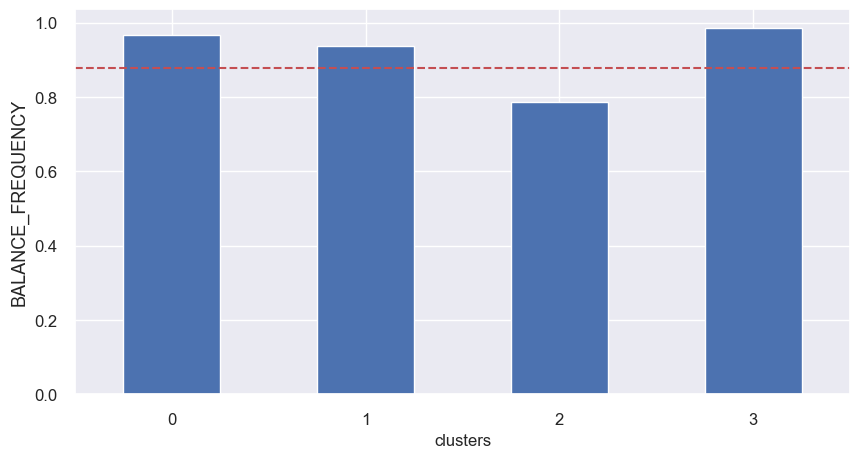

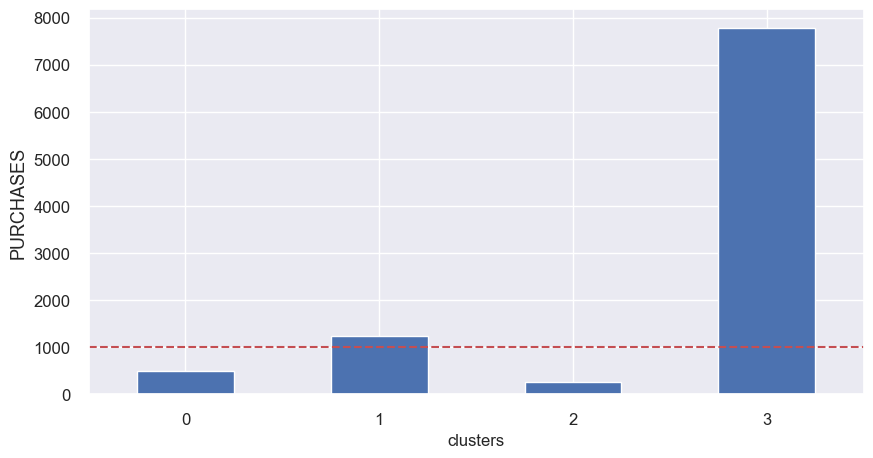

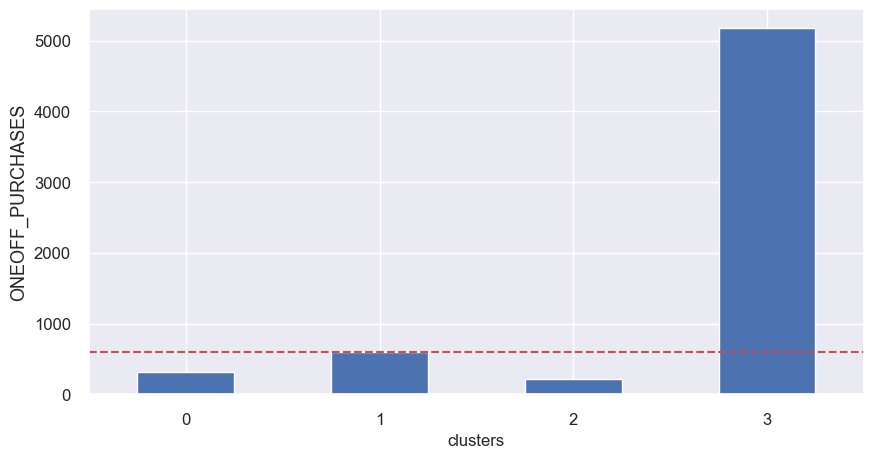

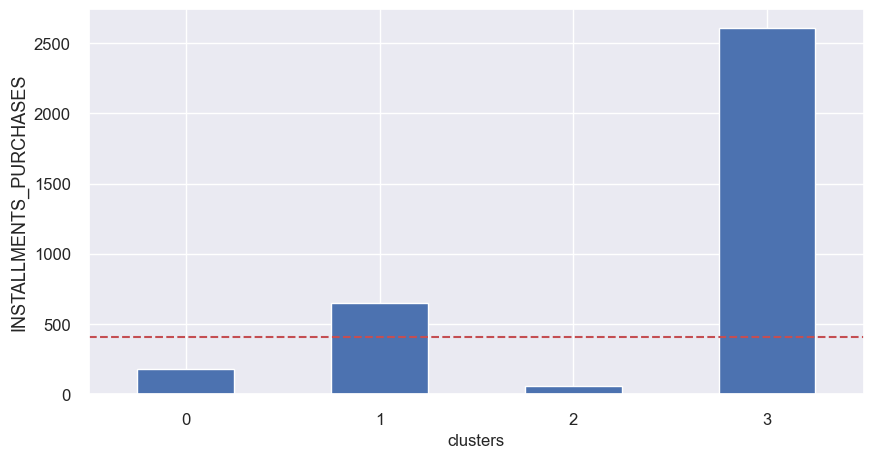

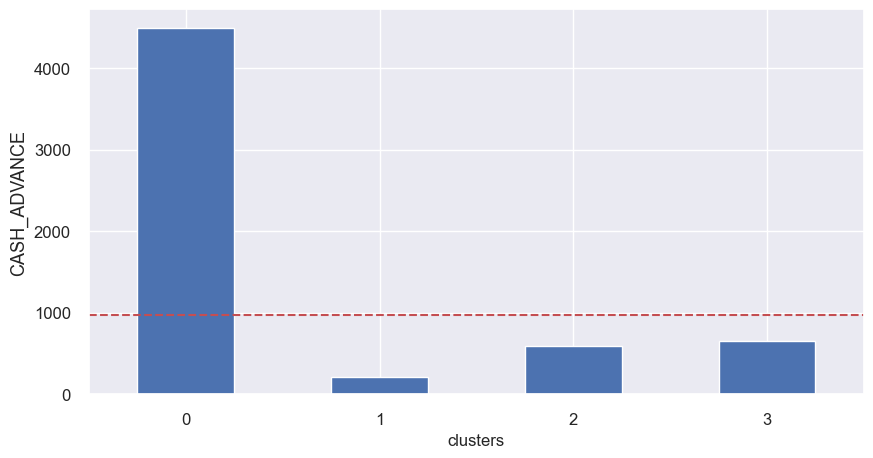

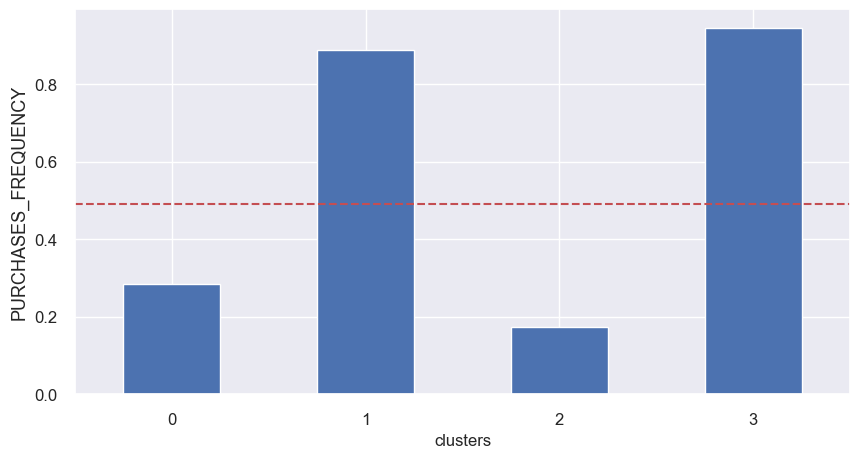

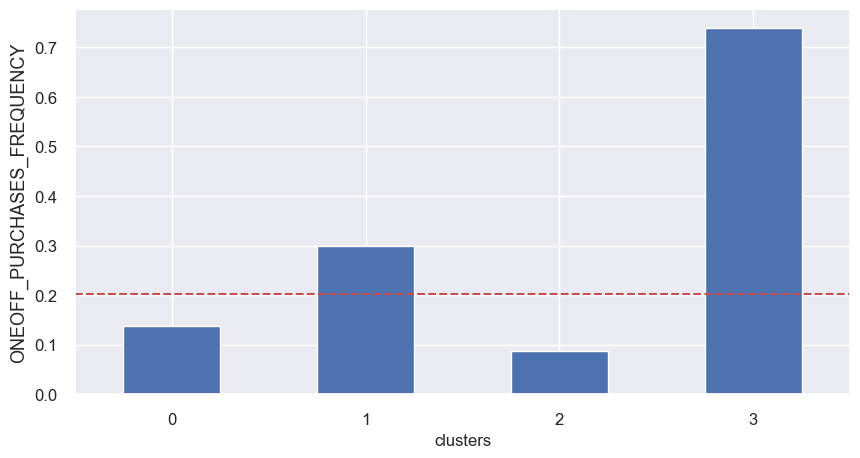

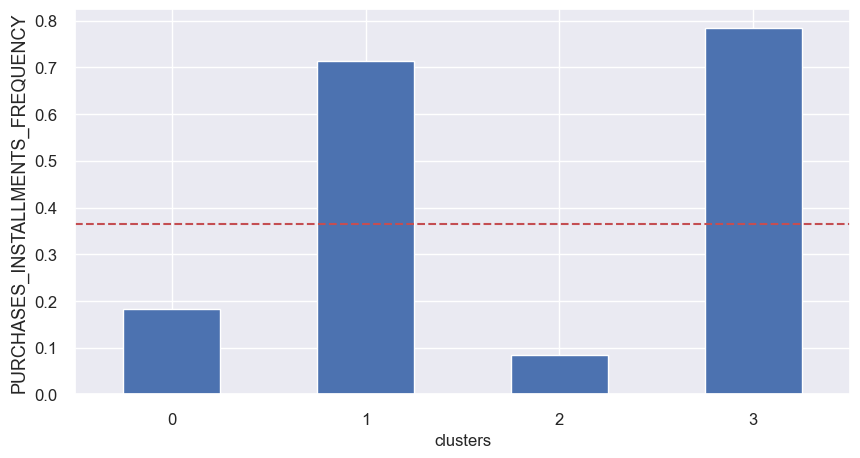

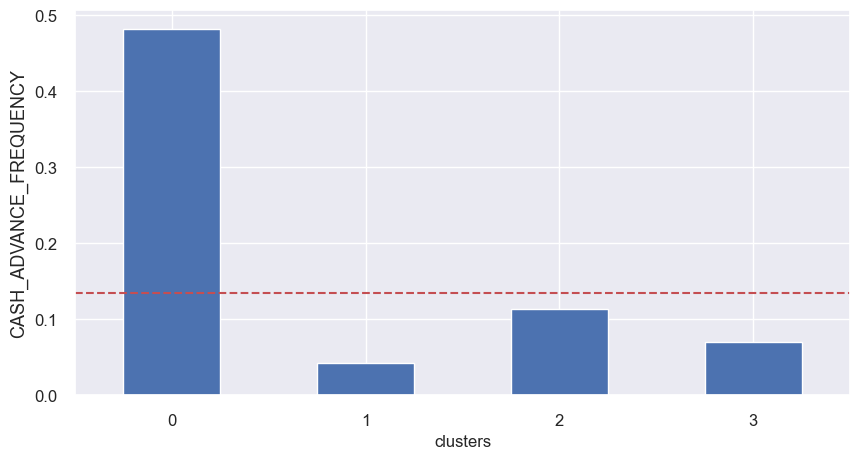

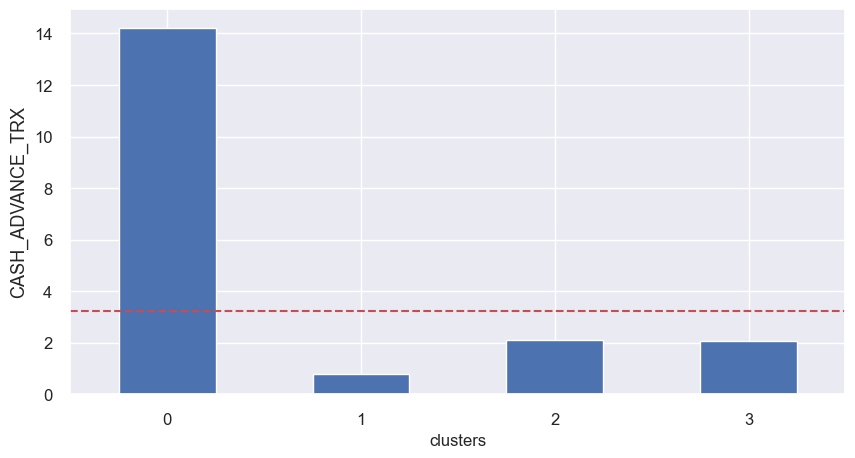

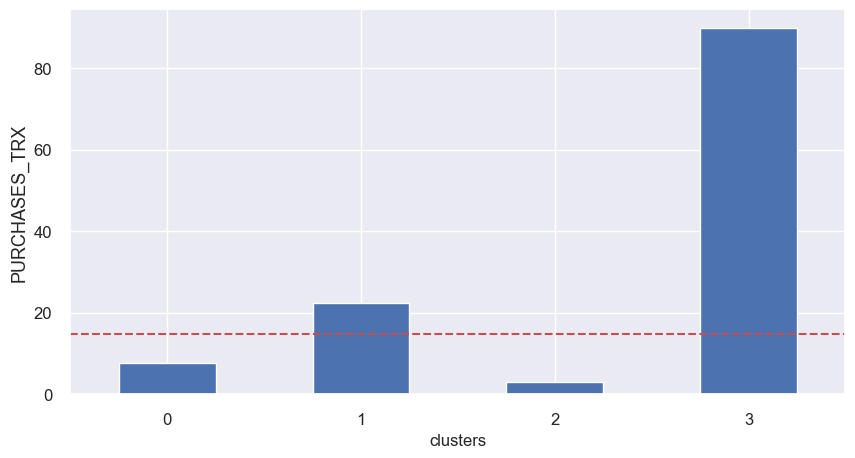

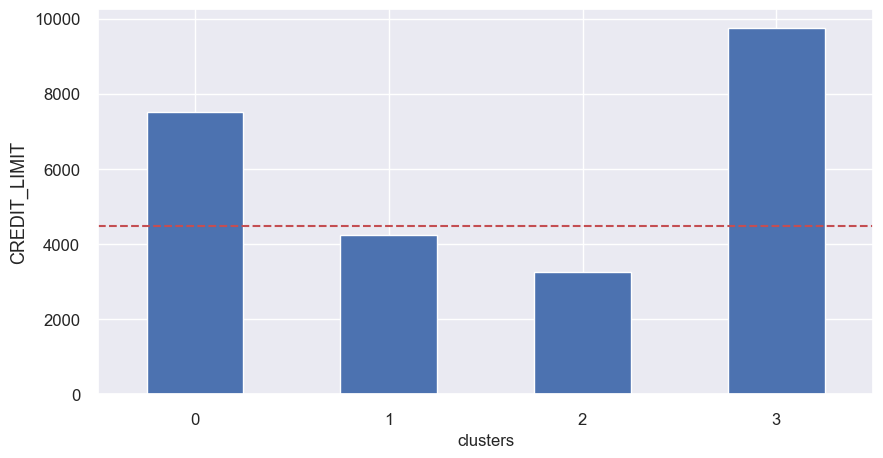

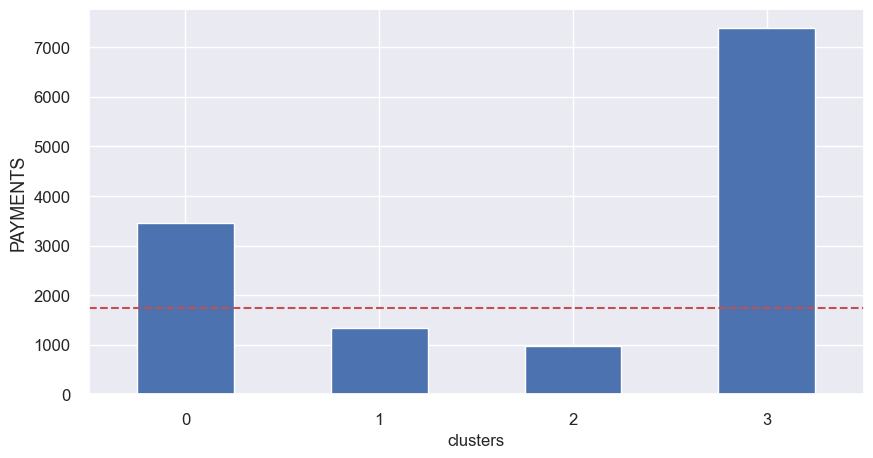

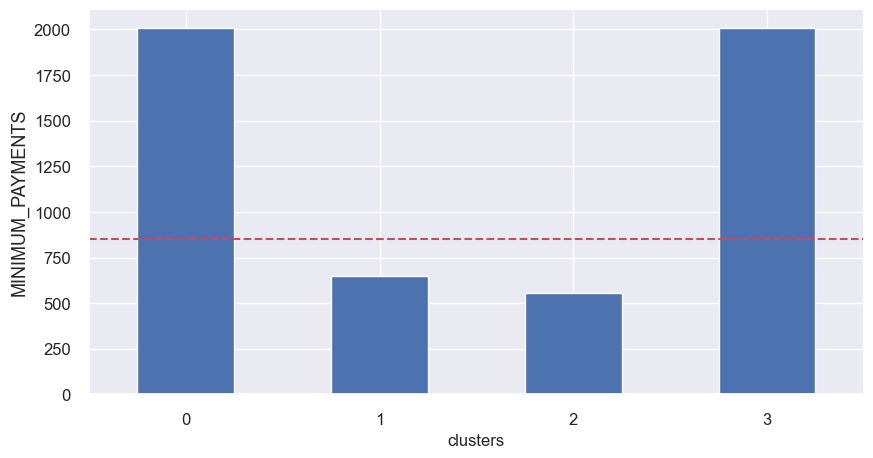

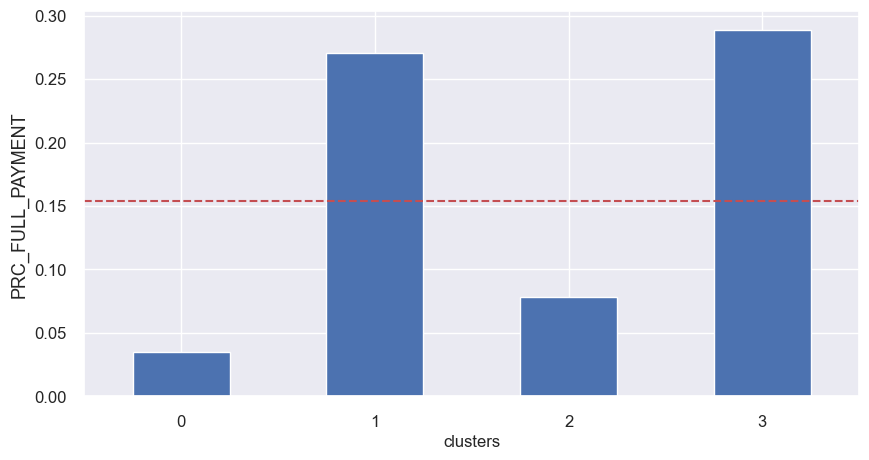

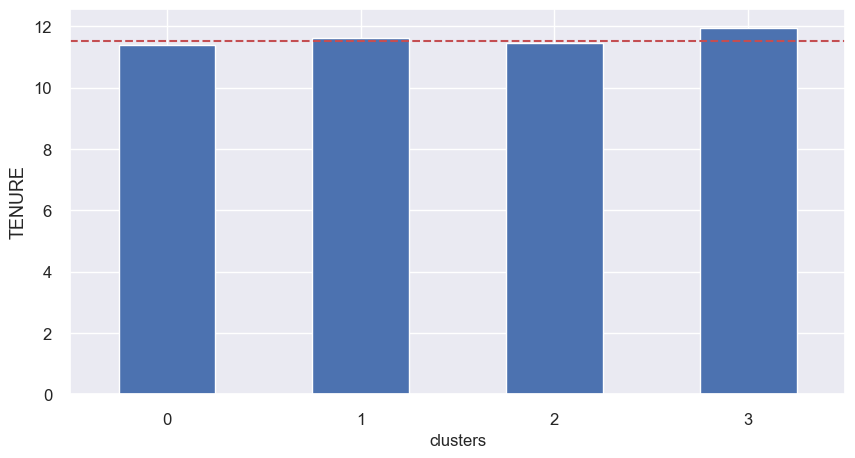

KeyError: 'clusters'

In [57]:
for col in final.columns:
    final.groupby('clusters').mean()[col].plot.bar(figsize=(10,5),rot=0)
    mean = final.mean()[col]
#     plt.title(f'{str(col)} PER CLUSTER',fontsize = 25)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.axhline(mean, color='r', linestyle='--')
#     plt.xlabel("clusters", fontsize=15)
    plt.ylabel(col,fontsize=13)
    plt.show()
    None

In [56]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## LABELS

In [43]:
# y = model.predict(X)
y

array([2, 0, 1, ..., 1, 2, 2])

In [ ]:
df.shape

In [44]:
pca_df = pca.fit_transform(df)

In [45]:
pca_df.shape

(8950, 14)

In [46]:
label = model.fit_predict(pca_X)

In [47]:
len(label)

8950

In [48]:
pd.Series(label).value_counts()

2    3994
1    3347
0    1211
3     398
dtype: int64

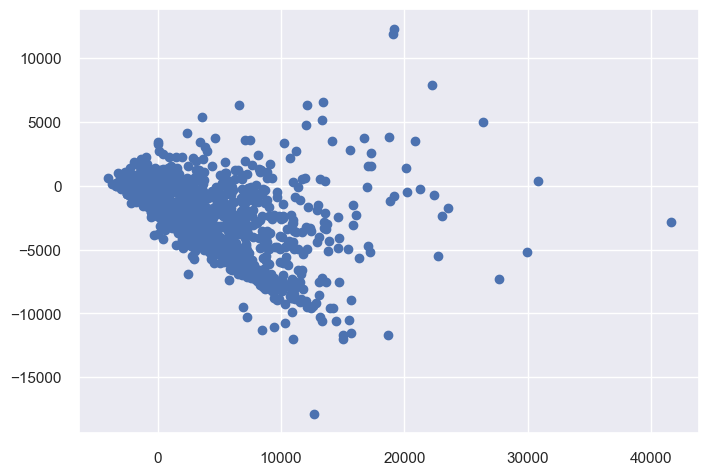

In [49]:
filtered_label0 = pca_df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

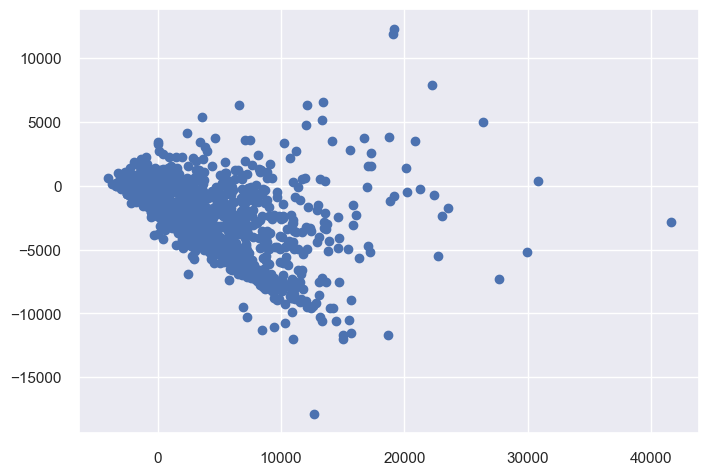

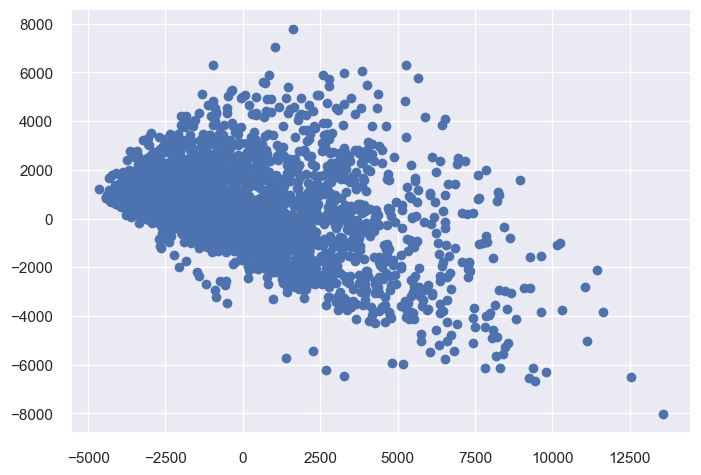

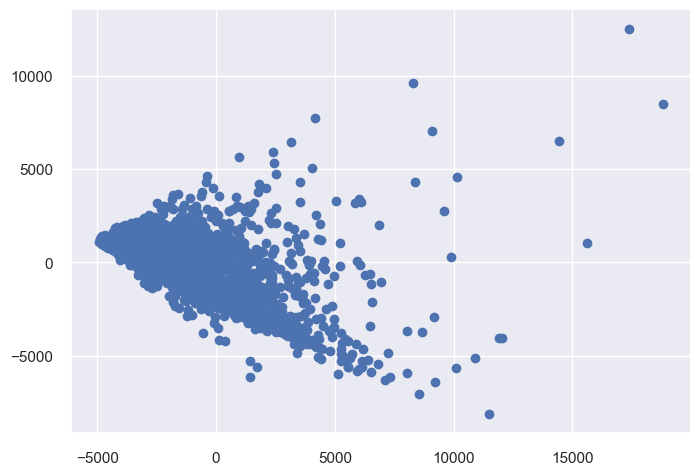

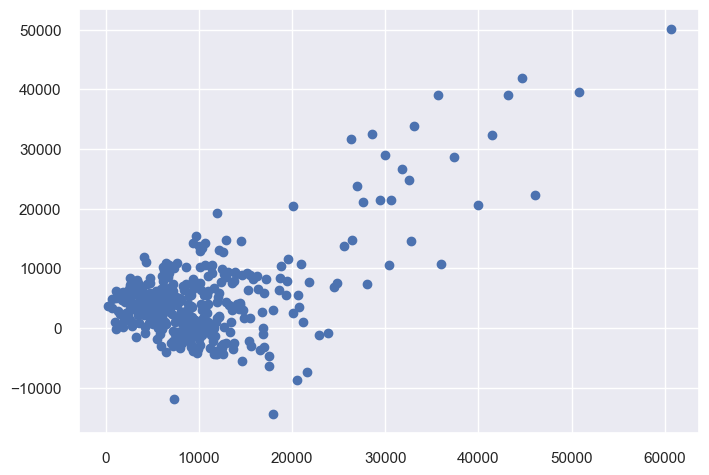

In [50]:
for i in range(4):
    filtered_labeli = pca_df[label == i]
 
#plotting the results
    plt.scatter(filtered_labeli[:,0] , filtered_labeli[:,1])
    plt.show()

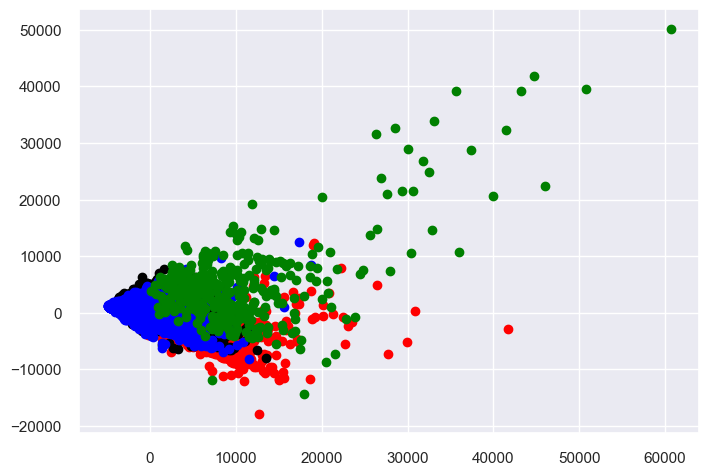

In [51]:
filtered_label0 = pca_df[label == 0]
filtered_label1 = pca_df[label == 1]
filtered_label2 = pca_df[label == 2]
filtered_label3 = pca_df[label == 3]

#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.show()

In [59]:
u_labels = np.unique(label)

NameError: name 'label' is not defined

In [58]:
for i in u_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.axis('off')
plt.show()

NameError: name 'u_labels' is not defined

## 3D

In [66]:
'''make an instance of the Model, either set n.comps or target variance'''
#pca = PCA(n_components=3)
pca_3d = PCA(3)

'''fit PCA on dataset.'''
pca3d = pca_3d.fit_transform(X)


pca3d_df = pd.DataFrame(data = pca3d)

In [67]:
pca3d_df

,0,1,2
0,-1.683958,-1.071998,0.470039
1,-1.133676,2.508413,0.606045
2,0.969344,-0.383715,0.083114
3,-0.883646,0.016686,1.474935
4,-1.600160,-0.683247,0.339775
...,...,...,...
8945,-0.363121,-2.013559,-0.961586
8946,-0.586138,-1.688585,-1.193801
8947,-0.929562,-1.808315,-0.446770
8948,-2.338183,-0.653976,0.990243


In [68]:
pca_3d.explained_variance_ratio_, ratio

(array([0.27297972, 0.20321259, 0.08822898]),
 array([2.72979716e-01, 2.03212586e-01, 8.82289837e-02, 7.48861631e-02,
        6.20552364e-02, 5.73999511e-02, 4.88169432e-02, 4.30838187e-02,
        3.78660961e-02, 3.07995732e-02, 2.37224657e-02, 1.77106798e-02,
        1.42676038e-02, 1.21711274e-02, 1.01278280e-02, 2.67054255e-03,
        6.85227412e-07]))

In [69]:
'''create df out of y'''
y_df = pd.DataFrame(y)

'''rename y col'''
y_df.rename(columns = {0:"Clusters"}, inplace=True)

'''link back the predicted array to initial dataframe'''
final_3d = pd.concat([pca3d_df, y_df], axis=1)

In [70]:
final_3d.rename(columns = {0 : "PCA1", 1: "PCA2", 2: "PCA3"}, inplace=True)

In [80]:
from matplotlib import cm

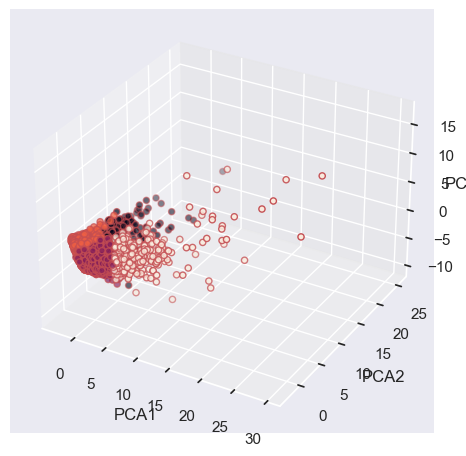

In [99]:
'''3d plot - all data'''
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(final_3d["PCA1"], final_3d["PCA2"], final_3d["PCA3"], edgecolor="r", c = final_3d["Clusters"])


'''label name'''
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

## SAVE PLOT

In [ ]:
savefig('plot_name.png', transparent=True)

## t-SNE

In [95]:
from sklearn.manifold import TSNE

In [96]:
# X = ss.fit_transform(df)

tsne = TSNE(random_state=0)

tsne_X= tsne.fit_transform(pca_X)

In [100]:
y

array([2, 0, 1, ..., 1, 2, 2])

In [105]:
tsne_df = pd.DataFrame({'t-SNE axis-1':tsne_X[:,0], #the  first dimension created
                        't-SNE axis-2':tsne_X[:,1], #the second dimension
                        'target':y})
tsne_df.head()

,t-SNE axis-1,t-SNE axis-2,target
0,-22.734766,-14.898746,2
1,-12.620522,59.318840,0
2,33.799656,16.141834,1
3,-34.225075,-33.064293,2
4,-21.247503,-6.203830,2


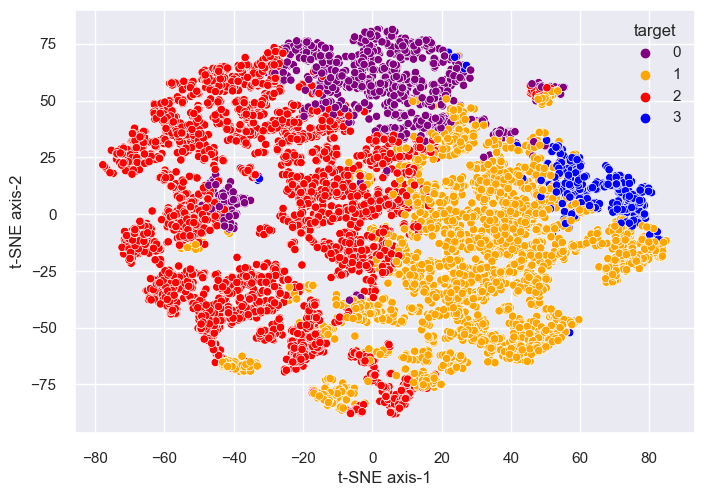

In [106]:
sns.scatterplot(x="t-SNE axis-1", y="t-SNE axis-2",
              hue="target",
              palette=['purple','orange','red','blue'],
              legend='full',
              data=tsne_df);

## LOCAL OUTLIER

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=3)
df['anomaly_label']=lof.fit_predict(X)

# negative values are outliers and positives inliers
# filter outlier values
df = df[df['anomaly_label']>0]

In [ ]:
len(df)

In [ ]:
df.sample(3)

In [ ]:
df.drop('anomaly_label',1,inplace=True)

In [ ]:
ss = StandardScaler()

ss.fit(df)

X = ss.transform(df)

X

In [ ]:
len(X)